In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit.library import QFT
from qiskit import *
from qiskit.circuit import Parameter
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.circuit.library import RZZGate
from matplotlib import pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
import numpy as np

D:\Anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


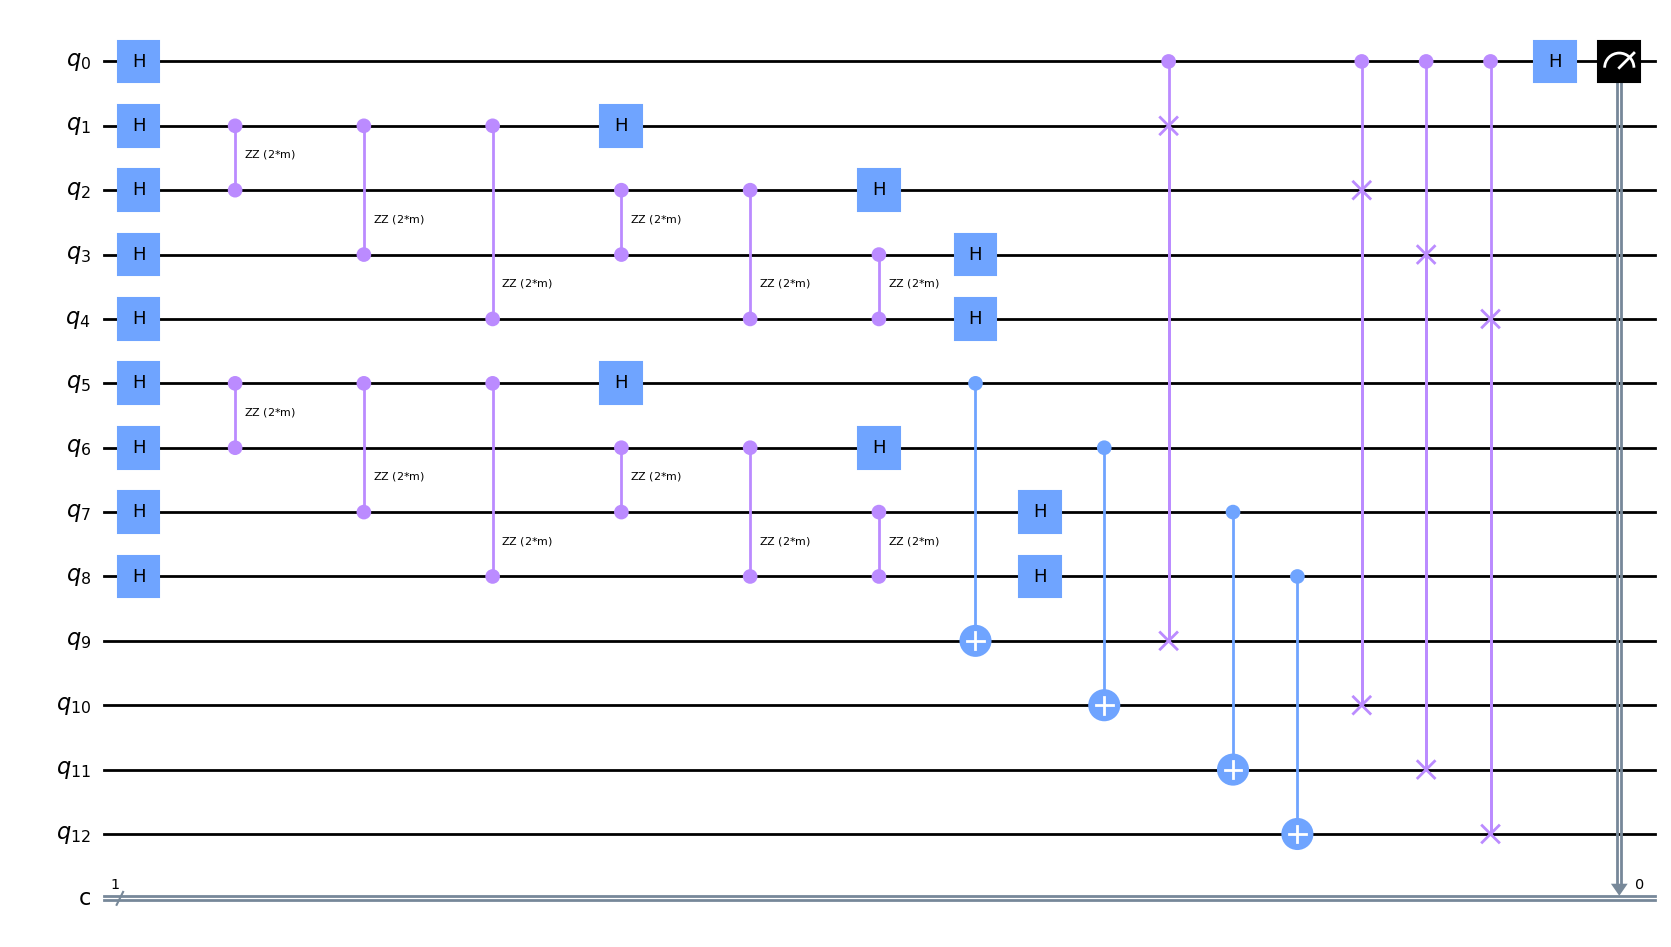

In [2]:
qc = QuantumCircuit(13, 1)
theta = Parameter('m')
CSWAP = SwapGate().control(1)
for i in range(9):
    qc.append(HGate(), [i])
theta = theta * 2
qc.rzz(theta, 1, 2)
qc.rzz(theta, 1, 3)
qc.rzz(theta, 1, 4)
qc.rzz(theta, 2, 3)
qc.rzz(theta, 2, 4)
qc.rzz(theta, 3, 4)

qc.rzz(theta, 5, 6)
qc.rzz(theta, 5, 7)
qc.rzz(theta, 5, 8)
qc.rzz(theta, 6, 7)
qc.rzz(theta, 6, 8)
qc.rzz(theta, 7, 8)
for i in range(1, 9):
    qc.append(HGate(), [i])
for i in range(4):
    qc.cx(5 + i, 9 + i)

qc.append(CSWAP, [0, 1, 9])
qc.append(CSWAP, [0, 2, 10])
qc.append(CSWAP, [0, 3, 11])
qc.append(CSWAP, [0, 4, 12])
qc.append(HGate(), [0])
# Measure qubit 0 to cbit 0, and qubit 1 to cbit 1
qc.measure(0, 0)
qc.draw('mpl')

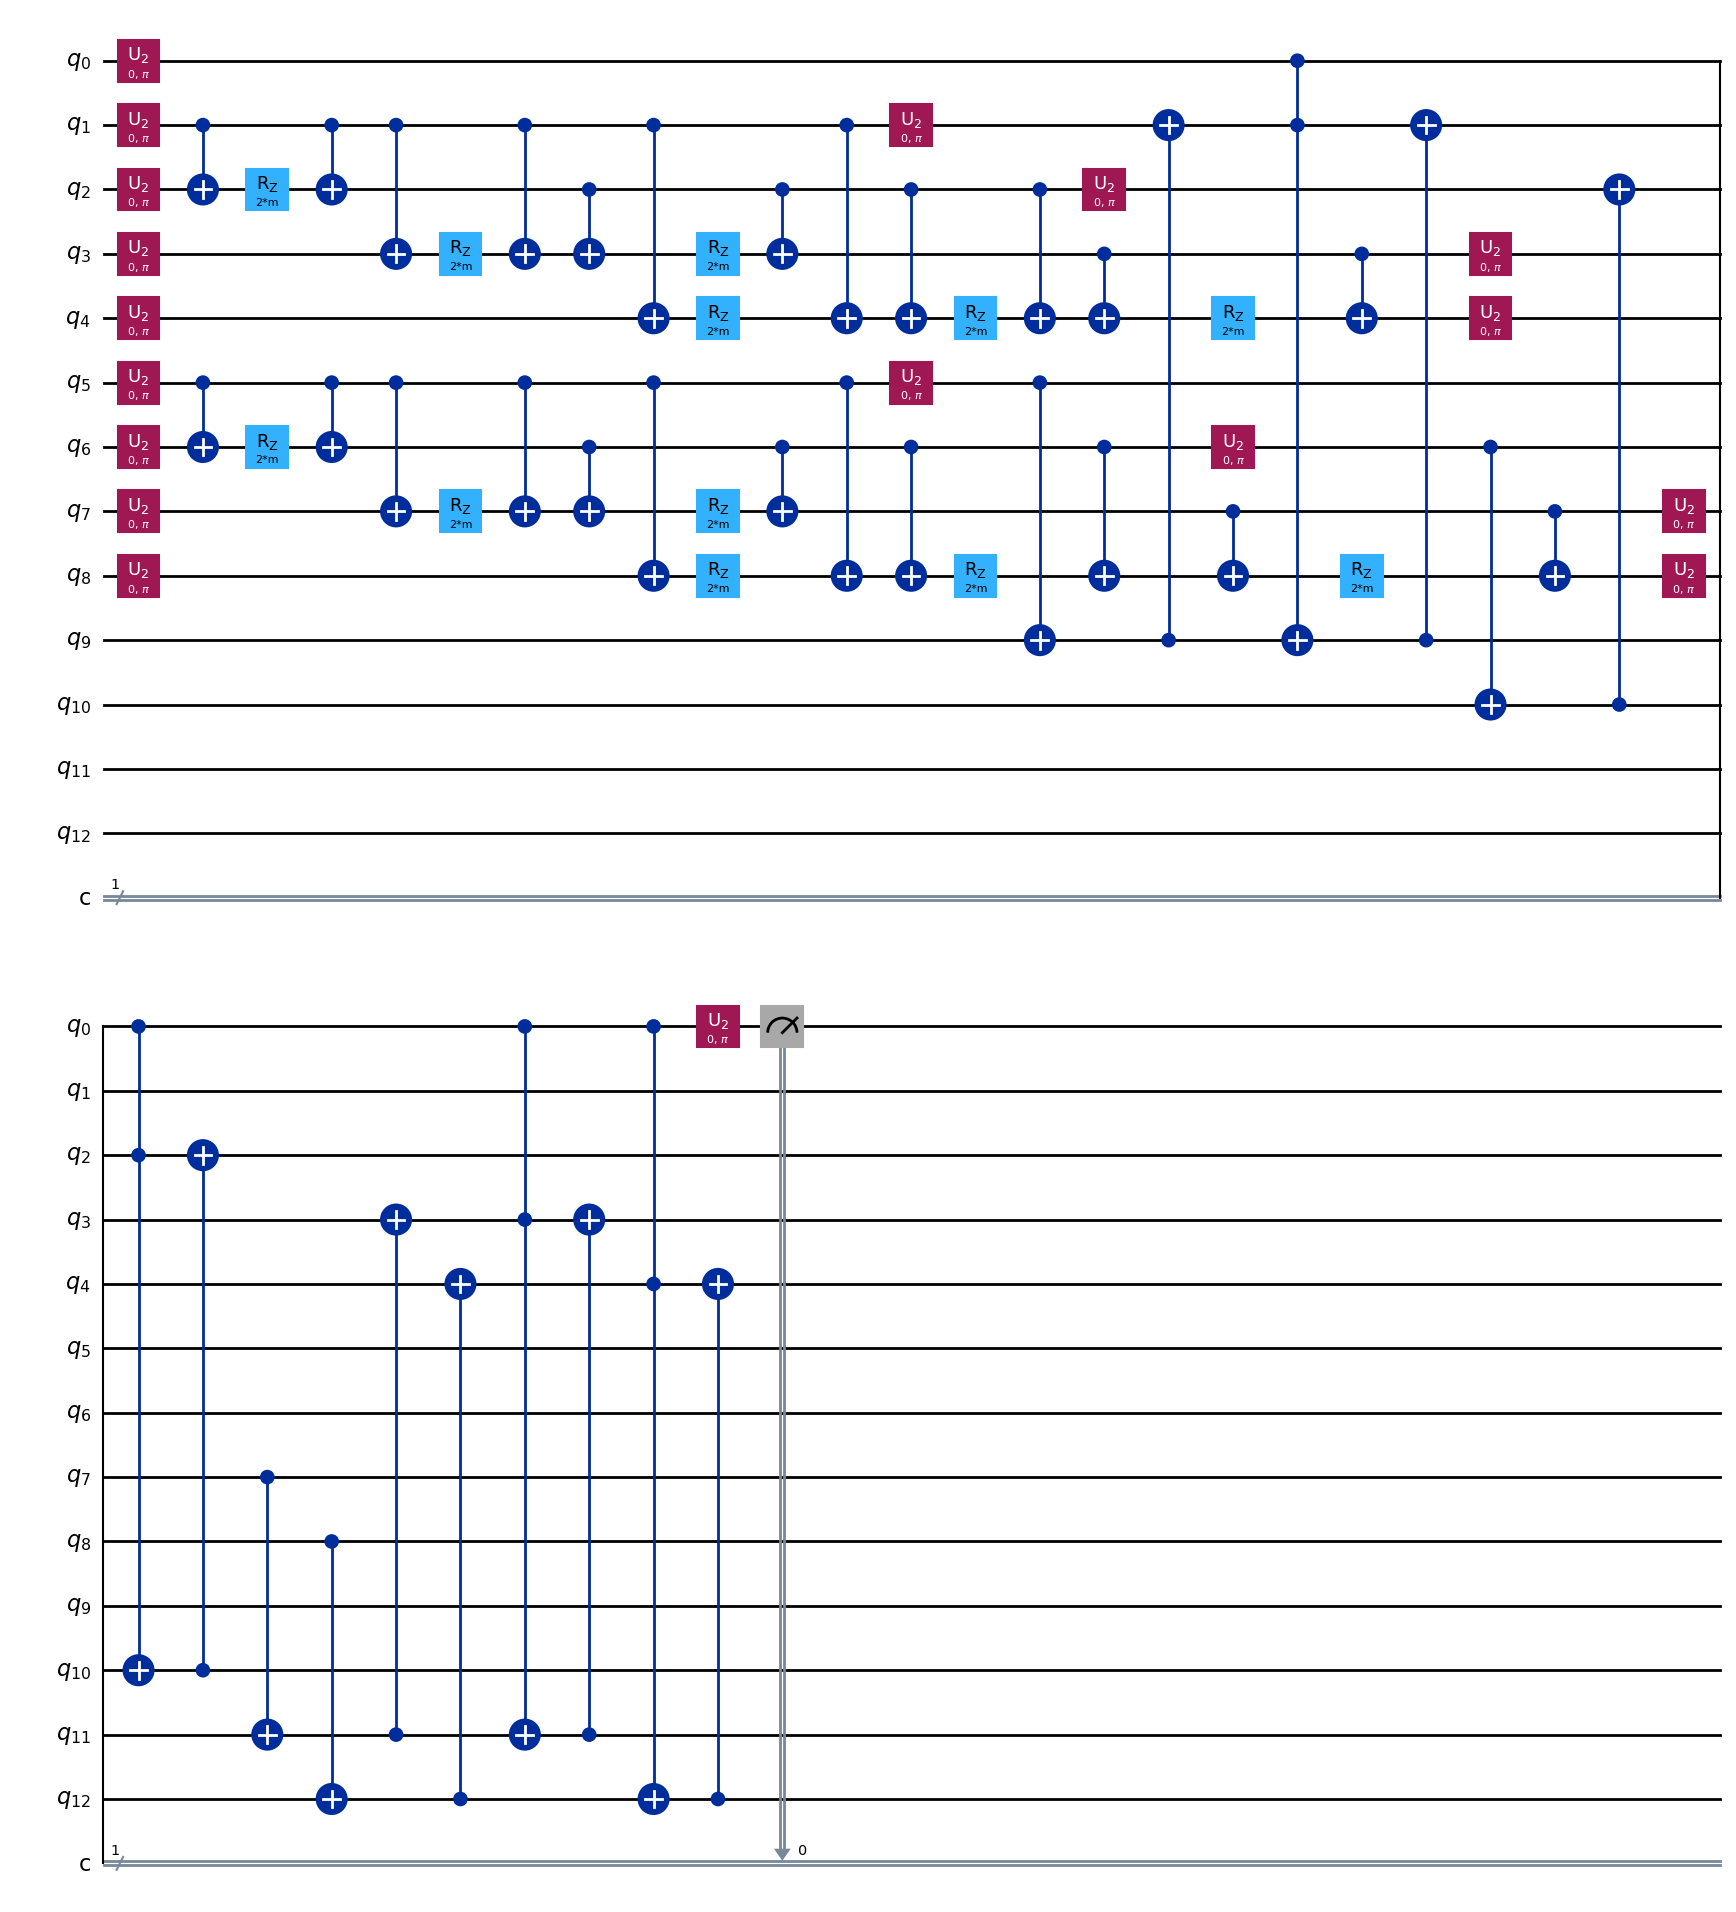

In [3]:
qc.decompose().draw("mpl", idle_wires=False, style="iqp")

# Backend Settings
### For CZ decomposition, available machine is: ibm_torino

In [4]:
# Set machine
backend_name = ""

service = QiskitRuntimeService(channel="", token="",instance="")
device = service.get_backend(backend_name)

QiskitBackendNotFoundError: 'No backend matches the criteria. Learn more about available backends here https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-choose-backend '

In [5]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.transpiler.passes.scheduling import (
    ALAPScheduleAnalysis,
    PadDynamicalDecoupling,
)
from qiskit.circuit.library import XGate, YGate 

# qc_cz = transpile(qc, coupling_map=None, basis_gates=['id', 'cx', 'sx', 'rz', 'sx'], optimization_level=3, seed_transpiler=1) 

target = device.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
pm.scheduling = PassManager(
    [
        ALAPScheduleAnalysis(durations=target.durations()),
        PadDynamicalDecoupling(
            durations=target.durations(),
            dd_sequences=[XGate(), XGate()],   # XX sequence
            pulse_alignment=target.pulse_alignment,
        ),
    ]
)

qc_ibm = pm.run(qc)

NameError: name 'device' is not defined

In [6]:
qc_ibm.depth()

NameError: name 'qc_ibm' is not defined

In [7]:
phases = np.linspace(0, 0.5*np.pi, 51)
individual_phases = [[phase] for phase in phases]
print(individual_phases)

[[0.0], [0.031415926535897934], [0.06283185307179587], [0.0942477796076938], [0.12566370614359174], [0.15707963267948966], [0.1884955592153876], [0.21991148575128555], [0.25132741228718347], [0.2827433388230814], [0.3141592653589793], [0.3455751918948773], [0.3769911184307752], [0.4084070449666731], [0.4398229715025711], [0.471238898038469], [0.5026548245743669], [0.5340707511102649], [0.5654866776461628], [0.5969026041820608], [0.6283185307179586], [0.6597344572538566], [0.6911503837897546], [0.7225663103256524], [0.7539822368615504], [0.7853981633974484], [0.8168140899333463], [0.8482300164692442], [0.8796459430051422], [0.9110618695410401], [0.942477796076938], [0.9738937226128359], [1.0053096491487339], [1.0367255756846319], [1.0681415022205298], [1.0995574287564276], [1.1309733552923256], [1.1623892818282235], [1.1938052083641215], [1.2252211349000195], [1.2566370614359172], [1.2880529879718152], [1.3194689145077132], [1.3508848410436112], [1.3823007675795091], [1.4137166941154071

In [8]:
backend = "simulator_statevector"
# # backend = Aer.get_backend('aer_simulator_statevector')
# # backend = service.least_busy(simulator=False,operational=True)


options = Options()
options.simulator.seed_simulator = None
options.execution.shots = 2048
options.optimization_level = 3 
options.resilience_level = 1 # measurement error mitigation

with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    dists = job.result().quasi_dists
print(dists)

runtime_job._start_websocket_client:WARNING:2023-12-25 14:06:56,824: An error occurred while streaming results from the server for job cm4hnr646skq4aiv179g:
Traceback (most recent call last):
  File "D:\Anaconda3\Lib\site-packages\qiskit_ibm_runtime\runtime_job.py", line 546, in _start_websocket_client
    self._ws_client.job_results()
  File "D:\Anaconda3\Lib\site-packages\qiskit_ibm_provider\api\clients\runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "D:\Anaconda3\Lib\site-packages\qiskit_ibm_provider\api\clients\base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_provider.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection. Error: Traceback (most recent call last):\n  File "D:\\Anaconda3\\Lib\\site-packages\\websocket\\_app.py", line 476, in setSock\n    self.sock.connect(\n  File "D:\\Anaconda3\\Lib\\site-packages\\websocket\\_core.py

[{0: 1.0}, {0: 0.9921875, 1: 0.0078125}, {0: 0.9794921875, 1: 0.0205078125}, {0: 0.94775390625, 1: 0.05224609375}, {0: 0.9150390625, 1: 0.0849609375}, {0: 0.87890625, 1: 0.12109375}, {0: 0.84130859375, 1: 0.15869140625}, {0: 0.80908203125, 1: 0.19091796875}, {0: 0.75048828125, 1: 0.24951171875}, {0: 0.7216796875, 1: 0.2783203125}, {0: 0.6943359375, 1: 0.3056640625}, {0: 0.6572265625, 1: 0.3427734375}, {0: 0.6513671875, 1: 0.3486328125}, {0: 0.63916015625, 1: 0.36083984375}, {0: 0.6181640625, 1: 0.3818359375}, {0: 0.6220703125, 1: 0.3779296875}, {0: 0.64794921875, 1: 0.35205078125}, {0: 0.63720703125, 1: 0.36279296875}, {0: 0.6650390625, 1: 0.3349609375}, {0: 0.6728515625, 1: 0.3271484375}, {0: 0.69287109375, 1: 0.30712890625}, {0: 0.71240234375, 1: 0.28759765625}, {0: 0.732421875, 1: 0.267578125}, {0: 0.7236328125, 1: 0.2763671875}, {0: 0.7392578125, 1: 0.2607421875}, {0: 0.75, 1: 0.25}, {0: 0.7392578125, 1: 0.2607421875}, {0: 0.72998046875, 1: 0.27001953125}, {0: 0.72314453125, 1: 0.2

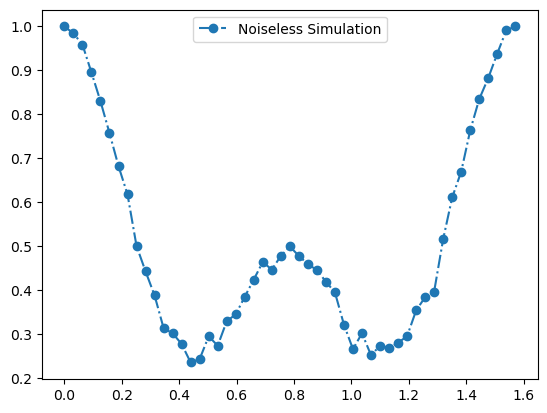

In [9]:
IPR_simulated = []
for i in range(51):
    IPR_simulated.append(2*(dists[i][0]-0.5))

plt.plot(individual_phases,IPR_simulated, "o-.", label="Noiseless Simulation")
plt.legend()

# Run on real device

In [10]:
# Create a Sampler object
options = Options()
options.execution.shots = 2048
options.optimization_level = 3 # no optimization
options.resilience_level = 1 # error mitigation
# options.transpilation.routing_method = 'sabre'
# options.transpilation.layout_method = 'noise_adaptive'
# options.transpilation.skip_transpilation = True   # set to true if DD activated

with Session(service=service, backend=device) as session:
    sampler = Sampler(session=session, options=options)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    dists_exp = job.result().quasi_dists
print(dists_exp)

NameError: name 'device' is not defined

In [ ]:
IPR_exp = []
for i in range(51):
    IPR_exp.append((dists_exp[i][0]))

plt.plot(individual_phases, IPR_exp, "o-.", label="Experiments")
plt.legend()